# Hi!

I'm **Rizky Anshari**

Notebook ini adalah bentuk evaluasi saya pada pembelajaran neural network.

### The Data
'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'

### The Objective
Memprediksi Churn dari dataset telco-customer-churn pada data Kaggle, menggunakan model Artificial Neural Network.
- pada pengamatan ini akan dibuat model model Artificial Neural Network terbaik untuk menentukan apakah customer churn atau tidak.
- dan Deployment Model.

![Image](https://miro.medium.com/max/1400/1*9xeFhmBT2ssJ1ejGccDLUA.png)

# A. Library
*Library - library yang digunakan :*

In [ ]:
# Data Exploring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data Modelling
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

# Data Evaluation
from sklearn.metrics import classification_report, confusion_matrix


# B. Data Loading
*pada data loading akan dilakukan pemuatan data dan mengamatan sederhana*

In [ ]:
# load dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# mengganti option agar seluruh kolom dapat ditampilkan
pd.set_option('display.max_columns', None)

In [ ]:
# menampilkan head data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# menapilkan 5 baris data terakhir
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.shape

(7043, 21)

- Dataset ini berisi **7043 baris** dan **21 kolom**.

### B1. Data information

In [ ]:
# menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari basic info ini dapat diketahui dataframe terbentuk dari:
- 1 kolom dengan tipe **float**
- 2 kolom dengan tipe **integer**
- 18 kolom dengan tipe **object**
- 2 kolom bertipe data **integer**
- **sekilas tidak ditemukan adanya missing value** namun akan dilihat lebih lanjut pada bagian **data cleaning**

In [ ]:
# describe data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- hanya **ditemukan 1 anomali** pada dataset, kolom **TotalCharges** tidak tertampil pada data describe. sepertinya **type datanya salah**, akan dilakukan perbaikan pada data cleaning.

In [ ]:
# mendefinisikan value pada masing2 kolom
print("All columns Unique values count")
for col in data:
    print(col, len(data[col].unique()), sep=': ')

All columns Unique values count
customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


## B2. Data Cleaning
*pada bagian ini akan dilakukan pembersihan data*

### B2.1 Replace Data Type
*pada bagian ini akan dilakukan pengubahan terhadap type data.*

memperbaiki type data pada kolom `TotalCharges`

In [ ]:
data['TotalCharges'] = data.TotalCharges.replace(' ', np.nan) # replace empty space with NaN

In [ ]:
data['TotalCharges'] = data['TotalCharges'].astype(float) # convert to float

- type data telah diperbaiki

### B2.2 Data Missing
*pada bagian ini akan dilakukan pengecekan terhadap missing value.*

In [ ]:
# menjumlahkan missing valaue setiap kolom
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- ditemukan **11 missing value** pada kolom `TotalCharges`, **karena jumlahnya sangat kecil sehingga tidak berpengaruh significant pada data jadi missing value akan didrop**.

In [ ]:
data = data.dropna()

### B2.3 Data duplicated
*pada bagian ini akan dilakukan pengecekan terhadap data duplikat.*

In [ ]:
# checking duplicated data
data.duplicated().sum()

0

- tidak ditemukan adanya data duplicated

# C.Exploratory Data Analysis
*exploring data*

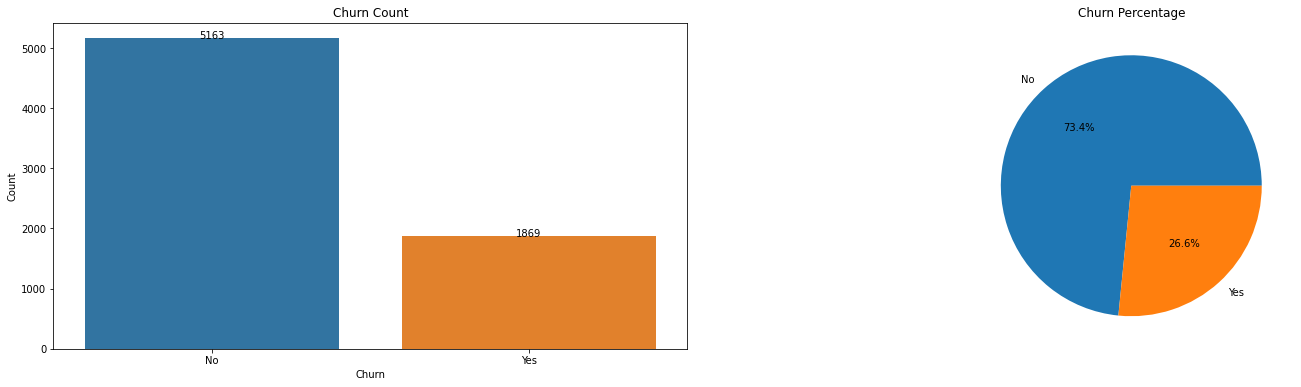

In [ ]:
# menampilkan persentase customer churn
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='Churn', data=data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.Churn.value_counts(), labels=data.Churn.value_counts().index, autopct='%1.1f%%')
plt.title('Churn Percentage')
plt.show()

diketahui dari data jumlah customer churn berjumlah 26.5% atau 1869 customer dan customer tidak churn 73.5% atau 5175 customer.
seperempat customer sudah dicategorikan churn.

ini harus ditindak dan diperbaiki dengan segera karena jumlah persentase dari customer churn sudah sangat banyak.

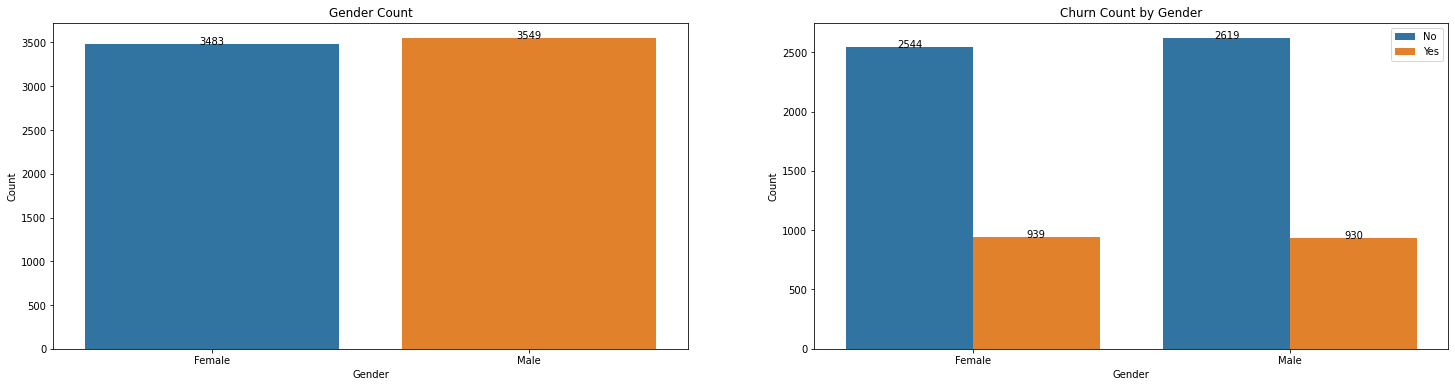

In [ ]:
# menampilkan persentase customer churn berdasarkan jenis kelamin
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='gender', data=data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
fig = sns.countplot(x='gender', data=data, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

Jumlah customer pria dan wanita hampir sama dan jumlah churn nya pun juga tidak begitu jauh.

sekilas tidak ada pengaruh dari jenis kelamin ini terhadap churn.

# D. Data Preprocessing
*bagian ini berisi penyiapan data untuk modelling*

### D1. Data Prepared
*mempersiapkan data dan perbaikan data sebelum proses lebih lanjut*

Akan dihapus Kolom `customerID` karena diasumsikan tidak akan menjadi feature dan tidak memiliki hubungan.

In [ ]:
data = data.drop(columns=['customerID'])

Mengubah value pada kolom target yaitu kolom `churn` dengan encoding sederhana.

In [ ]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

### D2. Split Data
*akan dilakukan pemisahan data*

Akan dilakukan pemisahan data  training set, validation set, dan testing set dengan perbandingan **7:2:1**

In [ ]:
# df_train_val, df_test
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=23, stratify=data.Churn)

# df_train, df_val
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.Churn)

### D3. Feature and Target
*Memisahkan antara kolom feature dan kolom targetnya.*

In [ ]:
# Training 
X_train = df_train.drop(['Churn'], axis=1)
y_train = df_train['Churn']

# Validation
X_val = df_val.drop(['Churn'], axis=1)
y_val = df_val['Churn']

### D4. Pipeline Scalling dan Encoding Feature

kolom dengan type data numerical akan di scalling dan kolom dengan type data category akan di encoding

In [ ]:
# Scaling feature numeric
num_pipe = Pipeline([('scaler', StandardScaler())])

# Encoding feature categorical
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

# pipeline process
preprocessor = ColumnTransformer([
    ('num', num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

- Column Transformer digunakan karena pipeline proses menggunakan percabangan sehingga tidak dapat digunakan pipeline biasa satu arah

Menerapkan perubahan pipeline pada X_train dan X_val

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# E. Modelling ANN
*Artificial Neural Network*

### E1. Pipeline

In [ ]:
# Training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(500).batch(50)

# Validation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(500).batch(50)

- data train dan validation diberikan perlakuan shuffle dan dibagi perbatch(50)

### E2. Model

In [ ]:
# model dengan 5 hidden layer
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(32, activation='relu')(input_data)
hidden_2 = Dense(2, activation='relu')(hidden_1)
output_data = Dense(1, activation='sigmoid')(hidden_2 )

model = Model(inputs=input_data, outputs=output_data)

### E3. Model Training

In [ ]:
# Compile model
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_dataset, epochs=200, validation_data=val_dataset, verbose=0)

In [ ]:
# summary model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_83 (Dense)            (None, 32)                1472      
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 dense_85 (Dense)            (None, 8)                 136       
                                                                 
 dense_86 (Dense)            (None, 4)                 36        
                                                                 
 dense_87 (Dense)            (None, 2)                 10        
                                                                 
 dense_88 (Dense)            (None, 1)                 3   

### E4. Model Evaluation

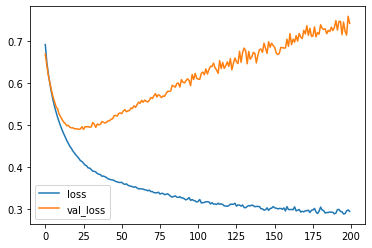

In [ ]:
# hasil model dimasukan pada dataframe
metrics = pd.DataFrame(history.history)

#
metrics[['loss', 'val_loss']].plot()

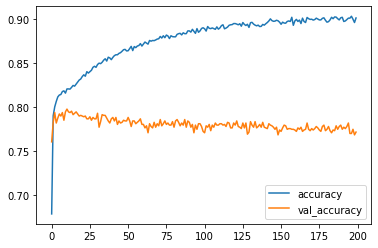

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
print('------------------Training Set------------------')
print(classification_report(y_train, model.predict(X_train).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val, model.predict(X_val).round()))

------------------Training Set------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3717
           1       0.92      0.69      0.79      1345

    accuracy                           0.90      5062
   macro avg       0.91      0.83      0.86      5062
weighted avg       0.90      0.90      0.90      5062

------------------Validation Set------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       929
           1       0.60      0.42      0.50       337

    accuracy                           0.77      1266
   macro avg       0.71      0.66      0.67      1266
weighted avg       0.76      0.77      0.76      1266



# F. Model Improvement

In [ ]:
# Define the model
# model dengan 5 hidden layer
input_data = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(32, activation='relu')(input_data)
hidden_2 = Dense(16, activation='relu')(hidden_1 )
hidden_3 = Dense(8, activation='relu')(hidden_2 )
hidden_4 = Dense(4, activation='relu')(hidden_3 )
hidden_5 = Dense(2, activation='relu')(hidden_4 )
output_data = Dense(1, activation='sigmoid')(hidden_5 )

model = Model(inputs=input_data, outputs=output_data)

# Compile the model
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_25 (Dropout)        (None, 45)                0         
                                                                 
 dense_89 (Dense)            (None, 16)                736       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_90 (Dense)            (None, 10)                170       
                                                                 
 dense_91 (Dense)            (None, 4)                 44        
                                                                 
 dense_92 (Dense)            (None, 2)                 10        
                                                                 
 dense_93 (Dense)            (None, 1)               

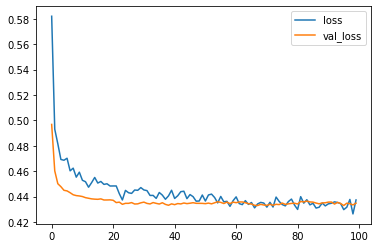

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot()

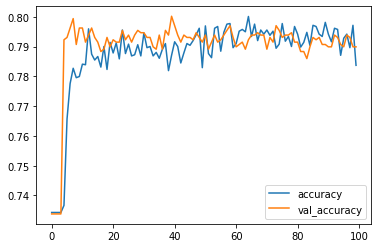

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
print('------------------Training Set------------------')
print(classification_report(y_train, model.predict(X_train).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val, model.predict(X_val).round()))

------------------Training Set------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3717
           1       0.69      0.50      0.58      1345

    accuracy                           0.81      5062
   macro avg       0.77      0.71      0.73      5062
weighted avg       0.80      0.81      0.80      5062

------------------Validation Set------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       929
           1       0.65      0.45      0.53       337

    accuracy                           0.79      1266
   macro avg       0.74      0.68      0.70      1266
weighted avg       0.78      0.79      0.78      1266



# G. Model Testing (Inference)

In [ ]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4569,Female,0,No,No,22,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.80,1054.60,1
2099,Female,0,Yes,No,40,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,0
6911,Female,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.10,1087.70,0
2329,Female,0,No,No,57,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,One year,No,Electronic check,94.70,5468.95,0
5157,Female,0,Yes,Yes,16,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),68.25,1114.85,0


In [ ]:
# Split features and target
X_test = df_test.drop(['Churn'], axis=1) # Features
y_test = df_test['Churn'] # Target

# Transform data test
X_test = preprocessor.transform(X_test)

# Predict data test
y_pred = model.predict(X_test).round()

# Membuat dataframe
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten().astype(int)})
predictions[predictions.Actual == 1].head(5)

,Actual,Predicted
4569,1,0
1176,1,1
2448,1,1
2262,1,1
1772,1,1


[[465  52]
 [100  87]]


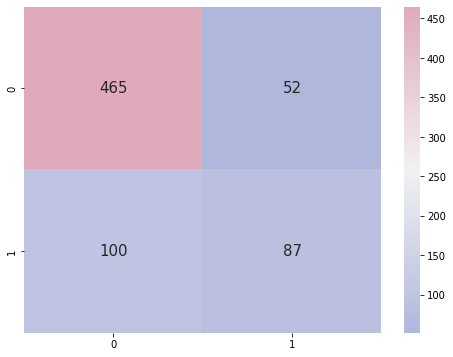

In [ ]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

# END GAME

# Model Saving and Deployment

In [ ]:
# Save model
model.save('model.h5')

# Save pipeline
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)